In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/gdrive/MyDrive/gender classification/archive (1).zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_ds="/content/Training"
test_ds="/content/Validation"


In [6]:
os.listdir('/content/Training')

['male', 'female']

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 


test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [8]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [9]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [10]:
img= train_generator[0]
print(img)

(array([[[[8.40000000e+01, 9.20000000e+01, 1.05000000e+02],
         [8.40000000e+01, 9.20000000e+01, 1.05000000e+02],
         [1.22417641e+02, 1.30417633e+02, 1.41816910e+02],
         ...,
         [1.14000000e+02, 1.12000000e+02, 1.23000000e+02],
         [1.14000000e+02, 1.12000000e+02, 1.23000000e+02],
         [1.15633110e+02, 1.13633110e+02, 1.26266220e+02]],

        [[8.40000000e+01, 9.20000000e+01, 1.05000000e+02],
         [8.40000000e+01, 9.20000000e+01, 1.05000000e+02],
         [1.22411514e+02, 1.30411514e+02, 1.41811035e+02],
         ...,
         [1.14000000e+02, 1.12000000e+02, 1.23000000e+02],
         [1.14000000e+02, 1.12000000e+02, 1.23000000e+02],
         [1.15632851e+02, 1.13632851e+02, 1.26265709e+02]],

        [[8.40000000e+01, 9.20000000e+01, 1.05000000e+02],
         [8.40000000e+01, 9.20000000e+01, 1.05000000e+02],
         [1.22405396e+02, 1.30405396e+02, 1.41805176e+02],
         ...,
         [1.14000000e+02, 1.12000000e+02, 1.23000000e+02],
         

In [11]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [12]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 2)


In [13]:
print(len(train_generator))
print(len(test_ds))


1470
19


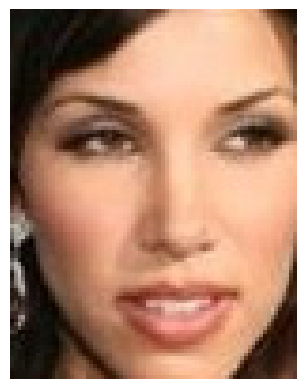

In [14]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/Training/female/131435.jpg.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

from google.colab.patches import cv2_imshow

In [16]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(2, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
model = VGG19((224, 224, 3))

In [18]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [19]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
history =model.fit(train_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
1470/1470 [==============================] - 893s 592ms/step - loss: 0.6484 - accuracy: 0.6152 - val_loss: 0.5378 - val_accuracy: 0.7512
Epoch 2/5
1470/1470 [==============================] - 871s 592ms/step - loss: 0.2856 - accuracy: 0.8783 - val_loss: 0.1498 - val_accuracy: 0.9449
Epoch 3/5
1470/1470 [==============================] - 874s 594ms/step - loss: 0.1534 - accuracy: 0.9447 - val_loss: 0.1163 - val_accuracy: 0.9566
Epoch 4/5
1470/1470 [==============================] - 874s 595ms/step - loss: 0.1419 - accuracy: 0.9489 - val_loss: 0.1264 - val_accuracy: 0.9488
Epoch 5/5
1470/1470 [==============================] - 897s 610ms/step - loss: 0.1256 - accuracy: 0.9559 - val_loss: 0.1023 - val_accuracy: 0.9666


In [22]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.648435,0.615180,0.537777,0.751223
1,0.285636,0.878342,0.149769,0.944888
2,0.153445,0.944670,0.116345,0.956563
3,0.141948,0.948903,0.126392,0.948751
4,0.125646,0.955881,0.102285,0.966607


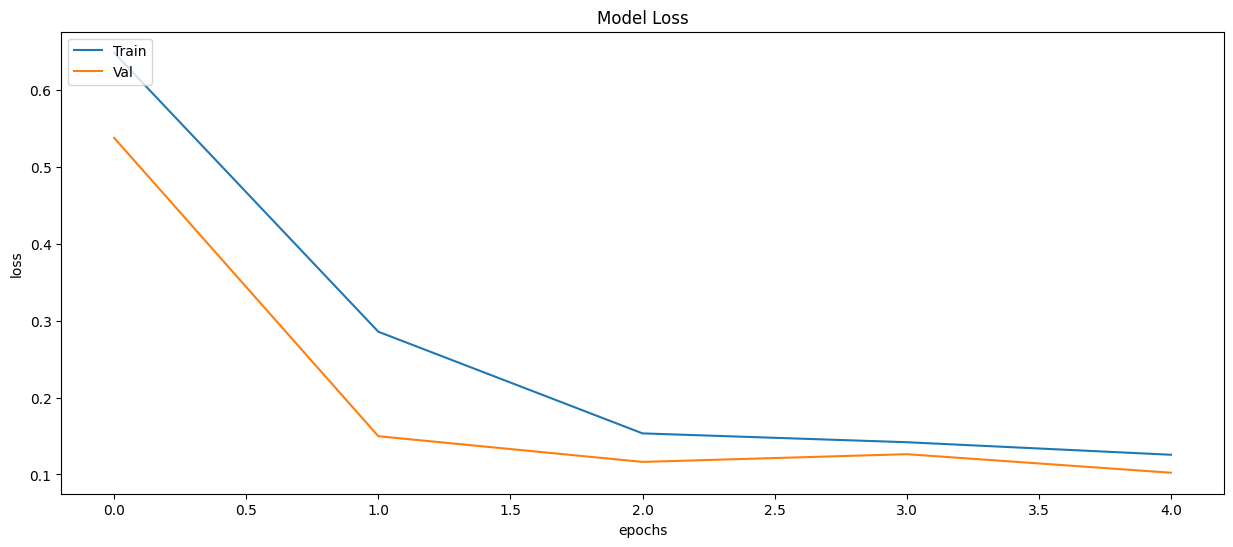

In [23]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

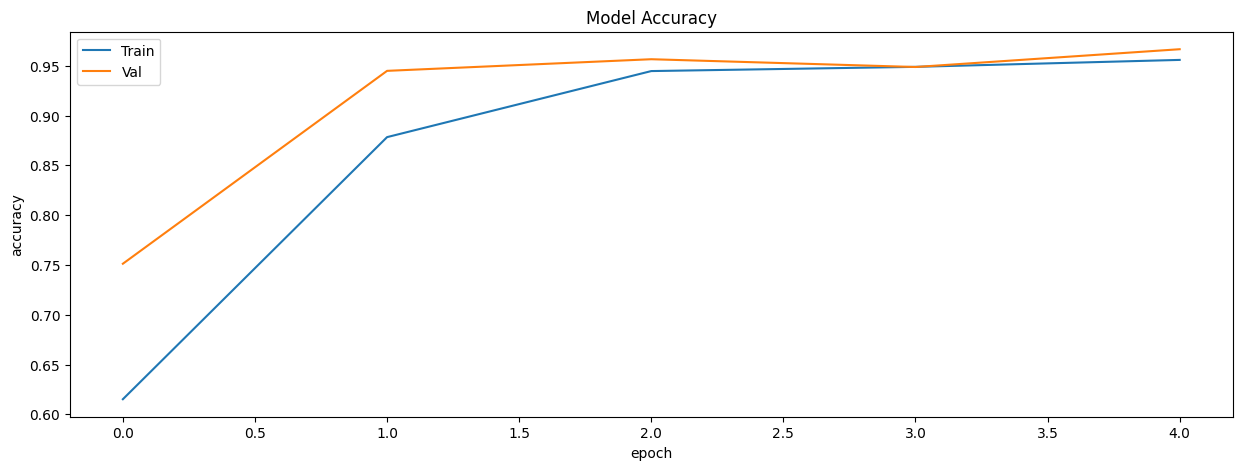

In [24]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

365/365 [==============================] - 53s 144ms/step


In [26]:
results =model.evaluate(test_generator)

365/365 [==============================] - 54s 147ms/step - loss: 0.1023 - accuracy: 0.9666
